Customer churn is the loss of existing customers. It is important to manage customer relations. This dataset is a record of credit card customers.We are to establish a reations between attributes and predict a model to forecast what kind of cutomers will close the Account.



## Importing Modules

In [ ]:
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post4-py3-none-any.whl size=2973 sha256=8fb5db51023ce77fd8444daa8f4f7946dfdaf8ca35902eab465bd776867b9e25
  Stored in directory: /root/.cache/pip/wheels/46/b8/69/4f7789b7d2fc0718a44cbc4ae5d40970a40c22c472ae50f0a1
Successfully built sklearn


In [ ]:
!pip install imblearn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install pandas_profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 74.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 46.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=e904d04f555373daa8bd32a500203009f0b59d54325c73

In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, make_scorer, confusion_matrix
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import learning_curve
%matplotlib inline

<ipython-input-10-2ad18bfb4b74>:21: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


## Loading Data

In [ ]:
# This code reads a CSV file named "BankChurners.csv" into a Pandas DataFrame.
df = pd.read_csv("/BankChurners.csv")

## Data Exploration and removing unnecessary columns

In [ ]:
# This code display the 5 random samples
df.sample(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
3369,711529383,Existing Customer,47,F,3,Graduate,Married,$40K - $60K,Blue,41,...,6602.0,1224,5378.0,0.665,3163,73,0.825,0.185,0.000164,0.999840
6011,785262333,Attrited Customer,46,M,5,Uneducated,Unknown,$40K - $60K,Blue,40,...,6185.0,1960,4225.0,0.669,2225,45,0.875,0.317,0.997430,0.002569
7811,714923583,Attrited Customer,38,F,2,Graduate,Unknown,Less than $40K,Blue,36,...,2369.0,0,2369.0,0.510,1924,48,0.548,0.000,0.994470,0.005530
5967,716641983,Existing Customer,55,F,4,College,Single,Unknown,Blue,36,...,7790.0,753,7037.0,0.968,4835,84,0.826,0.097,0.000308,0.999690
9864,720633558,Existing Customer,37,F,3,Graduate,Divorced,Less than $40K,Blue,24,...,3727.0,995,2732.0,0.743,14786,101,0.656,0.267,0.000535,0.999460


In [ ]:
# This code tells the number of columns and rows in dataframe
df.shape

(10127, 23)

In [ ]:
# This code drops the columns that would not be helping us for classification
df.drop('CLIENTNUM', axis='columns', inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', axis='columns', inplace=True)
df.drop('Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2', axis='columns', inplace=True)

In [ ]:
# This code displays some of the random 5 sample of dataframe
df.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
8335,Existing Customer,43,F,3,Uneducated,Single,Less than $40K,Blue,25,2,3,3,1616.0,966,650.0,0.647,4774,74,0.805,0.598
8005,Existing Customer,52,F,3,Uneducated,Single,Less than $40K,Blue,36,2,1,3,3240.0,0,3240.0,0.812,4803,83,0.804,0.000
8730,Existing Customer,52,F,2,High School,Single,$40K - $60K,Blue,39,2,1,1,12214.0,2379,9835.0,0.769,8426,105,0.544,0.195
6968,Attrited Customer,46,F,1,High School,Married,Less than $40K,Blue,42,5,4,1,1438.3,0,1438.3,0.637,1843,44,0.630,0.000
4027,Attrited Customer,49,M,2,High School,Divorced,$80K - $120K,Blue,36,4,2,4,34516.0,2517,31999.0,0.376,1789,48,0.455,0.073


In [ ]:
# The info() method provides a concise summary of the DataFrame, including its column names, data types, and number of non-null values.

df.info

<bound method DataFrame.info of           Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Singl

In [ ]:
# This code displays the datatype of the columns. This helps us to identify either all the columns are in numeric or not.
# As per result some are in object means string that needs to be handled
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
# Cheching that is there any null value in the data frame
df.isnull().values.any()

False

In [ ]:
# The describe() method provides a statistical summary of the DataFrame's numerical columns, including count, mean, standard deviation, minimum, maximum, and quartiles.
df.describe()

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [ ]:
# Cheching either the dataset is balanced or not
# As both values are imbalanced
count = df["Attrition_Flag"].value_counts()
count

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [ ]:
#Making a function that Prints the unique values of any columns in the DataFrame with the object data type.
def print_unique(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}')

In [ ]:
print_unique(df)

Attrition_Flag: ['Existing Customer' 'Attrited Customer']
Gender: ['M' 'F']
Education_Level: ['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status: ['Married' 'Single' 'Unknown' 'Divorced']
Income_Category: ['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category: ['Blue' 'Gold' 'Silver' 'Platinum']


In [ ]:
# Converting the catagory of gender column in 0 and 1.
yes_no_Column = ['Gender']

for col in yes_no_Column:
    df[col].replace({'F': 1, 'M': 0}, inplace=True)

In [ ]:
# Converting the catagory of Attrition_Flag column in 0 and 1.

yes_no_Column = ['Attrition_Flag']

for col in yes_no_Column:
    df[col].replace({'Existing Customer': 1, 'Attrited Customer': 0}, inplace=True)

In [ ]:
# Displaying 5 random samples
df.sample(5)

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
7742,1,43,1,3,Graduate,Single,Unknown,Blue,33,3,3,1,2341.0,1818,523.0,0.833,4356,70,0.628,0.777
6361,1,52,1,1,Graduate,Married,$40K - $60K,Blue,34,3,3,3,4189.0,2066,2123.0,0.686,4661,85,0.735,0.493
242,0,49,0,5,College,Married,$40K - $60K,Blue,45,2,2,3,1438.3,0,1438.3,0.734,815,21,0.615,0.000
1524,1,32,0,1,High School,Married,$60K - $80K,Blue,24,4,2,2,4116.0,1223,2893.0,0.730,1657,38,0.520,0.297
4961,1,43,1,3,Unknown,Divorced,Less than $40K,Blue,30,3,2,1,2905.0,2079,826.0,0.789,4444,84,0.909,0.716


In [ ]:
# now again cheching the data type to check wether gender and Attrition_Flag are int or not. 
df.dtypes

Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## Data Visualization

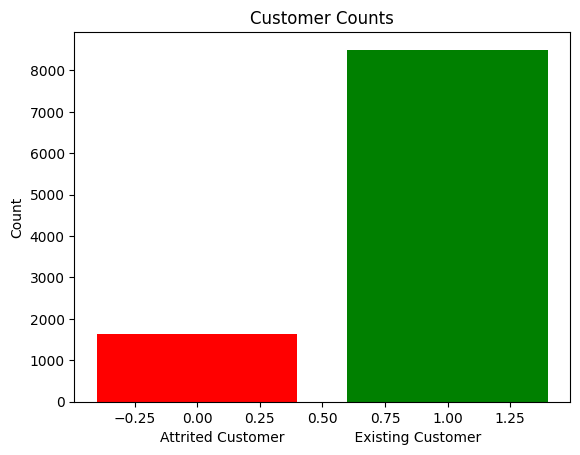

In [ ]:
# Compute the counts of attrited and existing customers
customer_counts = df['Attrition_Flag'].value_counts()

# Define colors for the bars
colors = ['green', 'red']

# Create a bar chart of the customer counts
plt.bar(customer_counts.index, customer_counts.values, color=colors)

# Set the chart title and axis labels
plt.title('Customer Counts')
plt.xlabel('Attrited Customer                Existing Customer ')
plt.ylabel('Count')

# Display the chart
plt.show()

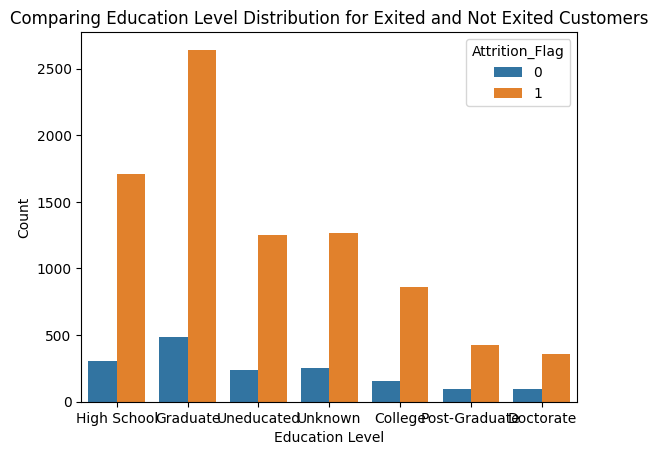

In [ ]:
# Create a count plot of education level distributions for exited and non-exited customers
sns.countplot(x='Education_Level', hue='Attrition_Flag', data=df)

# Set the x and y axis labels, and the plot title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Comparing Education Level Distribution for Exited and Not Exited Customers')

# Save the plot as an image file
plt.savefig("customerChurn1.png")

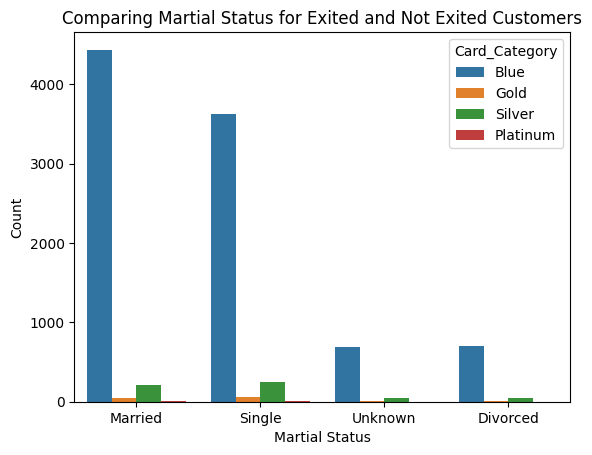

In [ ]:
sns.countplot(x='Marital_Status', hue='Card_Category', data=df)
plt.xlabel('Martial Status')
plt.ylabel('Count')
plt.title('Comparing Martial Status for Exited and Not Exited Customers')
plt.savefig("customerChurn2.png")

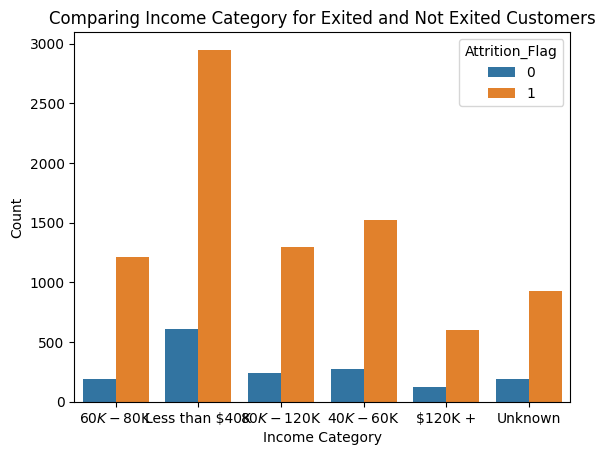

In [ ]:
sns.countplot(x='Income_Category', hue='Attrition_Flag', data=df)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Comparing Income Category for Exited and Not Exited Customers')
plt.savefig("customerChurn3.png")

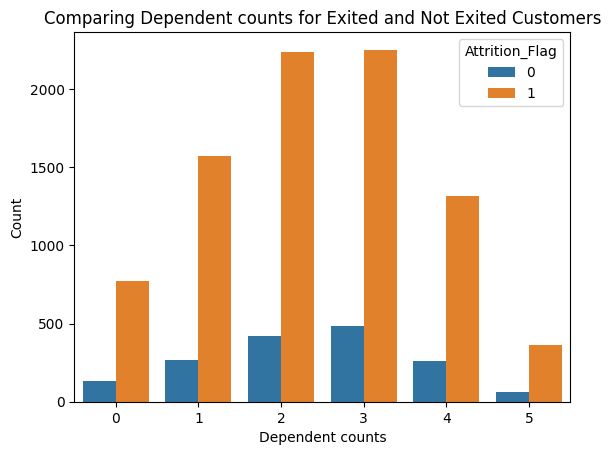

In [ ]:
sns.countplot(x='Dependent_count', hue='Attrition_Flag', data=df)
plt.xlabel('Dependent counts')
plt.ylabel('Count')
plt.title('Comparing Dependent counts for Exited and Not Exited Customers')
plt.savefig("customerChurn4.png")

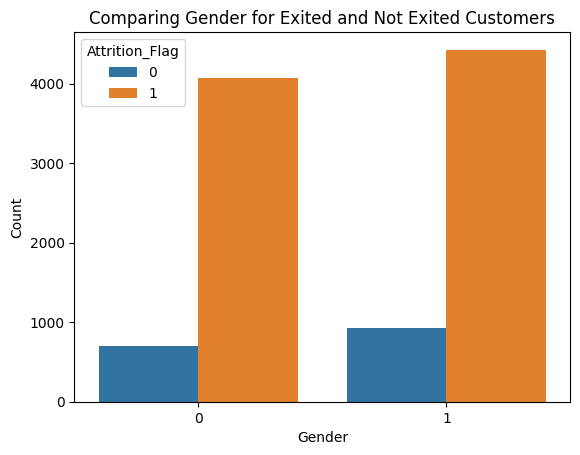

In [ ]:
sns.countplot(x='Gender', hue='Attrition_Flag', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Comparing Gender for Exited and Not Exited Customers')
plt.savefig("customerChurn5.png")

<ipython-input-38-5fbd4bf6547d>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


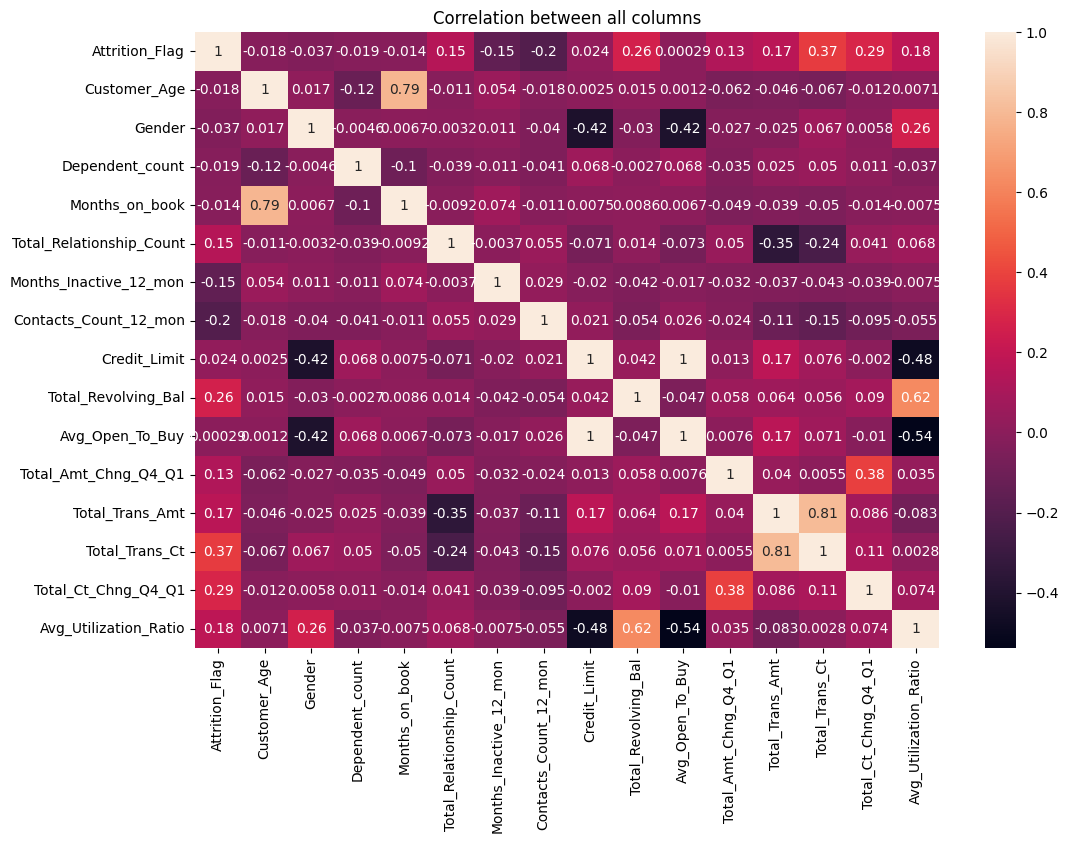

In [ ]:
# Set the size of the figure
plt.figure(figsize=(12,8))

# Create a heatmap of the correlations between all columns in the DataFrame, with annotations
sns.heatmap(df.corr(), annot=True)

# Set the plot title
plt.title('Correlation between all columns')

# Save the plot as an image file
plt.savefig("customerChurn6.png")

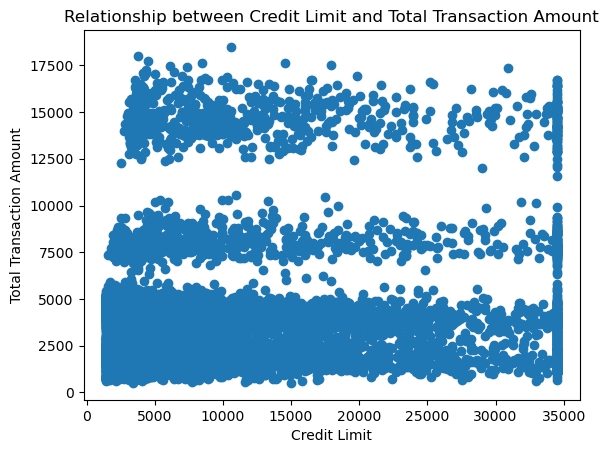

In [ ]:
plt.scatter(df['Credit_Limit'], df['Total_Trans_Amt'])
plt.title('Relationship between Credit Limit and Total Transaction Amount')
plt.xlabel('Credit Limit')
plt.ylabel('Total Transaction Amount')
plt.show()

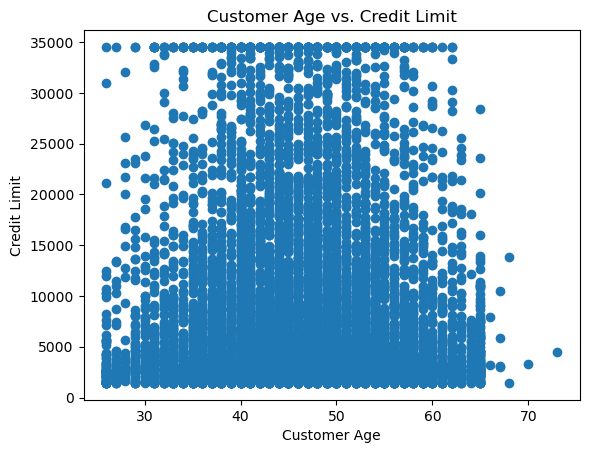

In [ ]:
plt.scatter(df["Customer_Age"], df["Credit_Limit"], color="#1f77b4")

# set the x-axis and y-axis labels and title
plt.xlabel("Customer Age")
plt.ylabel("Credit Limit")
plt.title("Customer Age vs. Credit Limit")
plt.show()

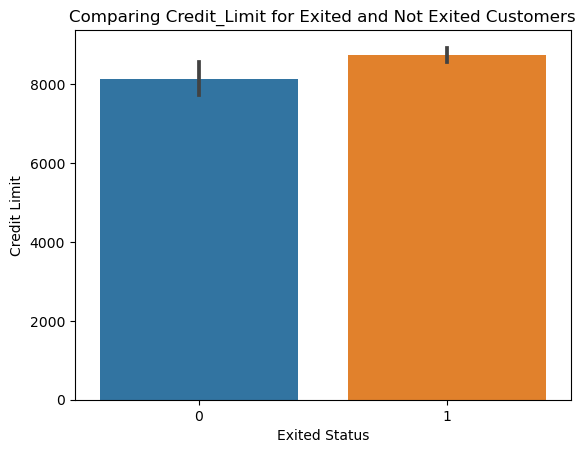

In [ ]:
exited_mean = df[df['Attrition_Flag'] == 1]['Credit_Limit'].mean()
not_exited_mean = df[df['Attrition_Flag'] == 0]['Credit_Limit'].mean()

sns.barplot(x=df['Attrition_Flag'], y=df['Credit_Limit'], estimator=np.mean)
plt.xlabel('Exited Status')
plt.ylabel('Credit Limit')
plt.title('Comparing Credit_Limit for Exited and Not Exited Customers')
plt.show()

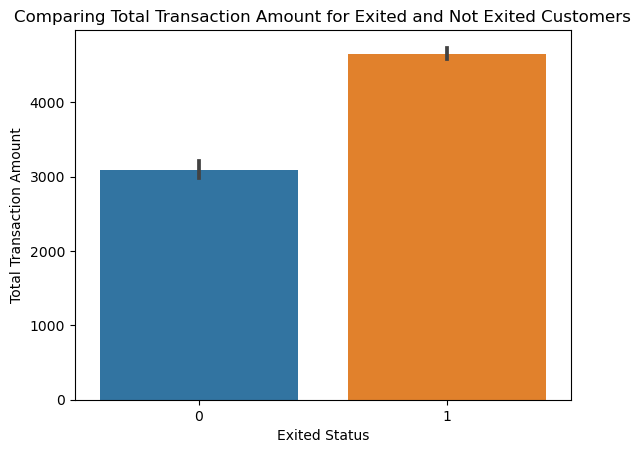

In [ ]:
exited_mean = df[df['Attrition_Flag'] == 1]['Total_Trans_Amt'].mean()
not_exited_mean = df[df['Attrition_Flag'] == 0]['Total_Trans_Amt'].mean()

sns.barplot(x=df['Attrition_Flag'], y=df['Total_Trans_Amt'], estimator=np.mean)
plt.xlabel('Exited Status')
plt.ylabel('Total Transaction Amount')
plt.title('Comparing Total Transaction Amount for Exited and Not Exited Customers')
plt.savefig("customerChurn8.png")

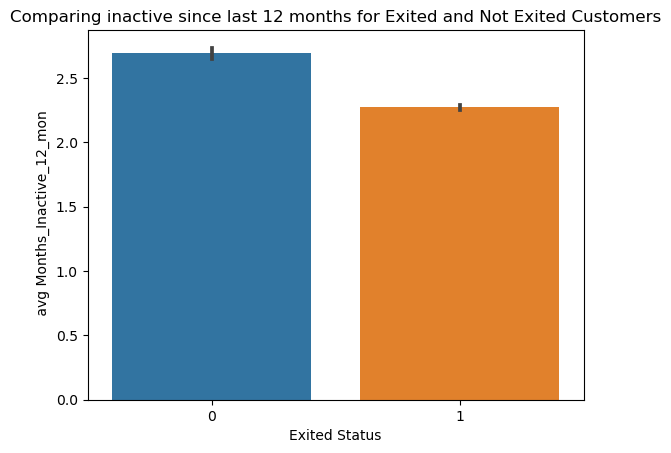

In [ ]:
exited_mean = df[df['Attrition_Flag'] == 1]['Months_Inactive_12_mon'].mean()
not_exited_mean = df[df['Attrition_Flag'] == 0]['Months_Inactive_12_mon'].mean()

sns.barplot(x=df['Attrition_Flag'], y=df['Months_Inactive_12_mon'], estimator=np.mean)
plt.xlabel('Exited Status')
plt.ylabel(' avg Months_Inactive_12_mon')
plt.title('Comparing inactive since last 12 months for Exited and Not Exited Customers')
plt.show()

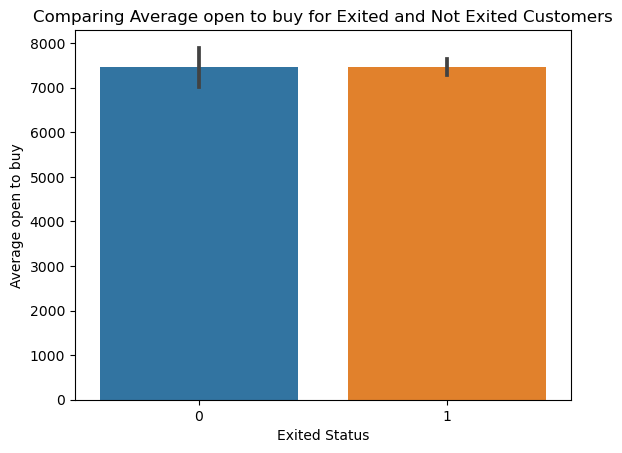

In [ ]:
exited_mean = df[df['Attrition_Flag'] == 1]['Avg_Open_To_Buy'].mean()
not_exited_mean = df[df['Attrition_Flag'] == 0]['Avg_Open_To_Buy'].mean()

sns.barplot(x=df['Attrition_Flag'], y=df['Avg_Open_To_Buy'], estimator=np.mean)
plt.xlabel('Exited Status')
plt.ylabel('Average open to buy')
plt.title('Comparing Average open to buy for Exited and Not Exited Customers')
plt.show()

In [ ]:
# Displaying the dataframe
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,1,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,1,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,1,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,1,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,0,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,0,41,0,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,0,44,1,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,0,30,0,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Preprocessing

In [ ]:
# Create dummy variables for the Education_Level, Marital_Status, Income_Category, and Card_Category columns
df = pd.get_dummies(data=df, columns=['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'])

In [ ]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,1,45,0,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,1,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,1,51,0,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,1,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,1,40,0,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,1,50,0,2,40,3,2,3,4003.0,1851,...,0,1,0,0,0,0,1,0,0,0
10123,0,41,0,2,25,4,2,3,4277.0,2186,...,0,1,0,0,0,0,1,0,0,0
10124,0,44,1,1,36,5,3,4,5409.0,0,...,0,0,0,0,1,0,1,0,0,0
10125,0,30,0,2,36,4,3,3,5281.0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
# Define the columns to be scaled
cols_to_scale = ['Total_Ct_Chng_Q4_Q1', 'Total_Trans_Ct', 'Total_Trans_Amt', 'Total_Amt_Chng_Q4_Q1', 'Avg_Open_To_Buy', 'Total_Revolving_Bal', 'Credit_Limit', 'Contacts_Count_12_mon', 'Months_Inactive_12_mon', 'Months_on_book', 'Total_Relationship_Count', 'Dependent_count', 'Customer_Age']
# Create a MinMaxScaler object to scale the values in same range
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [ ]:
df.shape

(10127, 37)

In [ ]:
# Create input features X by dropping the target variable column from the DataFrame
x = df.drop(['Attrition_Flag'], axis=1)

# Create target variable y by selecting the target variable column from the DataFrame
y = df['Attrition_Flag']

## Applying SMOTE to balance the dataset

In [ ]:
# Create a SMOTE object
smote = SMOTE()

# Use SMOTE to oversample the minority class in the target variable
x, y = smote.fit_resample(x, y)

In [ ]:
#Checking wether values are balanced now or not.
count = y.value_counts()
count

1    8500
0    8500
Name: Attrition_Flag, dtype: int64

In [ ]:
# Checking first 4 sample of x
x.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.404255,0,0.6,0.604651,0.8,0.166667,0.500000,0.340190,0.308701,0.345116,...,0,0,1,0,0,0,1,0,0,0
1,0.489362,1,1.0,0.720930,1.0,0.166667,0.333333,0.206112,0.343266,0.214093,...,0,0,0,0,1,0,1,0,0,0
2,0.531915,0,0.6,0.534884,0.6,0.166667,0.000000,0.059850,0.000000,0.098948,...,0,0,0,1,0,0,1,0,0,0
3,0.297872,1,0.8,0.488372,0.4,0.666667,0.166667,0.056676,1.000000,0.022977,...,0,0,0,0,1,0,1,0,0,0
4,0.297872,0,0.6,0.186047,0.8,0.166667,0.000000,0.099091,0.000000,0.136557,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
#Checking first 4 samples of label y
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition_Flag, dtype: int64

## StratifiedKFold and Applying classifiers                      

                                    
##### This code is performing 10-fold cross-validation using a decision tree classifier on the preprocessed and balanced dataset x and y. The goal is to evaluate the performance of the model on unseen data and to prevent overfitting.

##### The StratifiedKFold function is used to split the data into 10 folds. Stratified sampling is used to ensure that the proportion of classes in each fold is the same as the proportion of classes in the whole dataset.

##### In each iteration of the loop, the data is split into training and testing sets using the indices obtained from StratifiedKFold. The model is then trained on the training data using the fit method of the DecisionTreeClassifier. The model's accuracy is calculated using the score method on the testing data. The accuracy of the model for each fold is stored in the list lst_accu_stratified.

##### finally, the confusion matrix is calculated using the confusion_matrix function from sklearn.metrics on the last fold's testing data to see the distribution of predicted and actual values for each class.

In [ ]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.9382352941176471,
 0.9476470588235294,
 0.9388235294117647,
 0.9547058823529412,
 0.9476470588235294,
 0.94,
 0.9347058823529412,
 0.9488235294117647,
 0.9452941176470588,
 0.9429411764705883]

In [ ]:
# Making an average of accuracy of all 10 folds
np.average(lst_accu_stratified)

0.9438823529411765

In [ ]:
cd

array([[804,  46],
       [ 51, 799]], dtype=int64)

Text(70.0, 0.5, 'Truth')

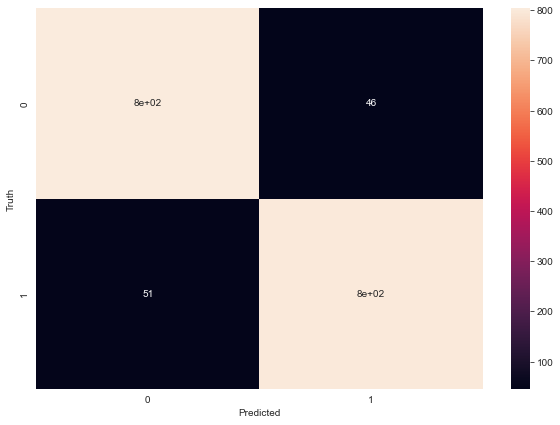

In [ ]:
#Displaying confusion metrix using seaborn and matplotlib
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# Getting classification report
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       850
           1       0.95      0.94      0.94       850

    accuracy                           0.94      1700
   macro avg       0.94      0.94      0.94      1700
weighted avg       0.94      0.94      0.94      1700



In [ ]:
model = RandomForestClassifier()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.9764705882352941,
 0.9782352941176471,
 0.9805882352941176,
 0.9788235294117648,
 0.9776470588235294,
 0.9782352941176471,
 0.9829411764705882,
 0.9758823529411764,
 0.9758823529411764,
 0.9752941176470589]

In [ ]:
np.average(lst_accu_stratified)

0.978

In [ ]:
cd

array([[831,  19],
       [ 23, 827]], dtype=int64)

Text(69.0, 0.5, 'Truth')

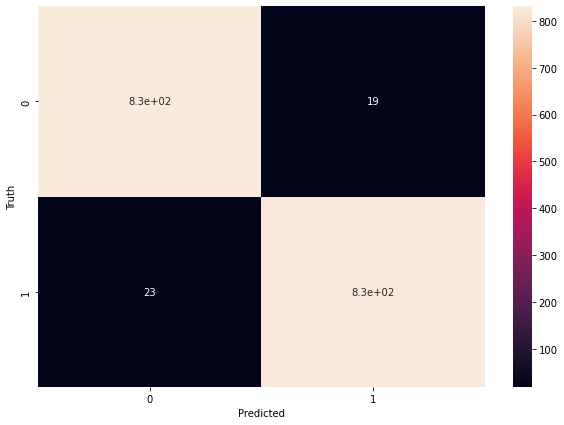

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       850
           1       0.98      0.97      0.98       850

    accuracy                           0.98      1700
   macro avg       0.98      0.98      0.98      1700
weighted avg       0.98      0.98      0.98      1700



In [ ]:
model = MultinomialNB()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.7205882352941176,
 0.7523529411764706,
 0.7341176470588235,
 0.731764705882353,
 0.7482352941176471,
 0.7235294117647059,
 0.7258823529411764,
 0.7258823529411764,
 0.7311764705882353,
 0.7505882352941177]

In [ ]:
np.average(lst_accu_stratified)

0.7344117647058823

In [ ]:
cd

array([[630, 220],
       [204, 646]], dtype=int64)

Text(69.0, 0.5, 'Truth')

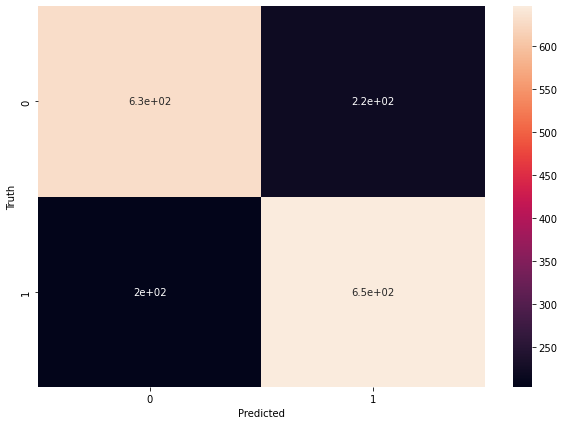

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.76      0.74      0.75       850
           1       0.75      0.76      0.75       850

    accuracy                           0.75      1700
   macro avg       0.75      0.75      0.75      1700
weighted avg       0.75      0.75      0.75      1700



In [ ]:
model = SGDClassifier()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.8770588235294118,
 0.8770588235294118,
 0.8852941176470588,
 0.8741176470588236,
 0.8711764705882353,
 0.8741176470588236,
 0.87,
 0.8776470588235294,
 0.8705882352941177,
 0.8594117647058823]

In [ ]:
np.average(lst_accu_stratified)

0.8736470588235294

In [ ]:
cd

array([[757,  93],
       [146, 704]], dtype=int64)

Text(69.0, 0.5, 'Truth')

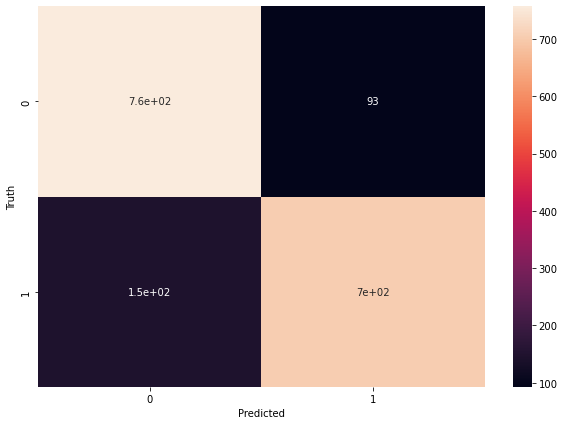

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       850
           1       0.88      0.83      0.85       850

    accuracy                           0.86      1700
   macro avg       0.86      0.86      0.86      1700
weighted avg       0.86      0.86      0.86      1700



In [ ]:
model = XGBClassifier()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.9829411764705882,
 0.99,
 0.9805882352941176,
 0.9847058823529412,
 0.9782352941176471,
 0.99,
 0.9847058823529412,
 0.9805882352941176,
 0.9852941176470589,
 0.9835294117647059]

In [ ]:
np.average(lst_accu_stratified)

0.9840588235294119

In [ ]:
cd

array([[839,  11],
       [ 17, 833]], dtype=int64)

Text(69.0, 0.5, 'Truth')

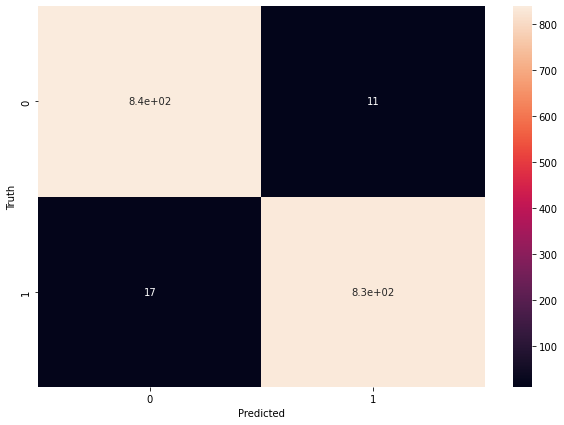

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       850
           1       0.99      0.98      0.98       850

    accuracy                           0.98      1700
   macro avg       0.98      0.98      0.98      1700
weighted avg       0.98      0.98      0.98      1700



In [ ]:
model = GradientBoostingClassifier()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.9747058823529412,
 0.9747058823529412,
 0.9747058823529412,
 0.9723529411764706,
 0.971764705882353,
 0.97,
 0.97,
 0.9682352941176471,
 0.9641176470588235,
 0.971764705882353]

In [ ]:
np.average(lst_accu_stratified)

0.9712352941176471

In [ ]:
cd

array([[827,  23],
       [ 25, 825]], dtype=int64)

Text(69.0, 0.5, 'Truth')

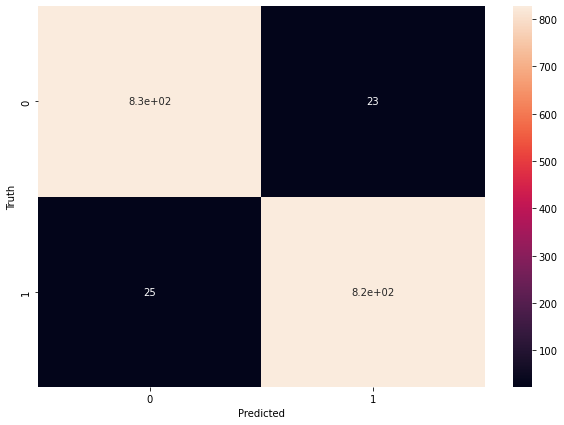

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       850
           1       0.97      0.97      0.97       850

    accuracy                           0.97      1700
   macro avg       0.97      0.97      0.97      1700
weighted avg       0.97      0.97      0.97      1700



In [ ]:
model = SVC()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.9223529411764706,
 0.9117647058823529,
 0.9147058823529411,
 0.91,
 0.92,
 0.9158823529411765,
 0.9229411764705883,
 0.9111764705882353,
 0.9235294117647059,
 0.9252941176470588]

In [ ]:
np.average(lst_accu_stratified)

0.9177647058823529

In [ ]:
cd

array([[793,  57],
       [ 70, 780]], dtype=int64)

Text(69.0, 0.5, 'Truth')

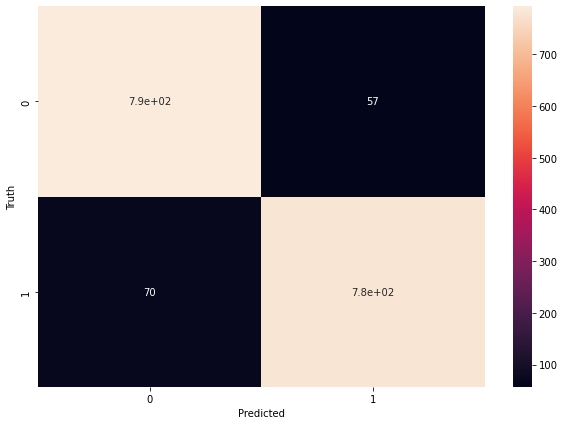

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       850
           1       0.93      0.92      0.92       850

    accuracy                           0.93      1700
   macro avg       0.93      0.93      0.93      1700
weighted avg       0.93      0.93      0.93      1700



In [ ]:
model = AdaBoostClassifier()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.9623529411764706,
 0.9605882352941176,
 0.9605882352941176,
 0.9629411764705882,
 0.9505882352941176,
 0.9570588235294117,
 0.9629411764705882,
 0.9582352941176471,
 0.9629411764705882,
 0.9623529411764706]

In [ ]:
np.average(lst_accu_stratified)

0.9600588235294119

In [ ]:
cd

array([[814,  36],
       [ 28, 822]], dtype=int64)

Text(69.0, 0.5, 'Truth')

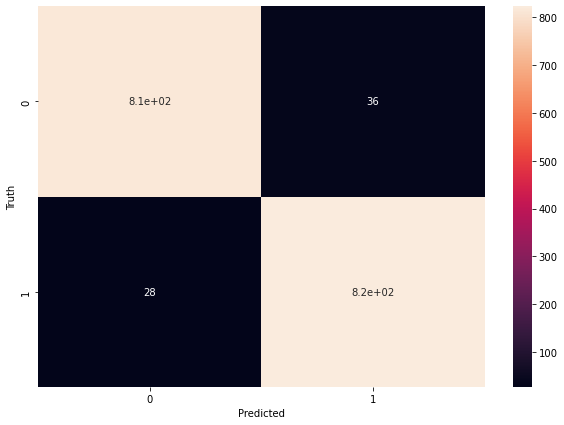

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       850
           1       0.96      0.97      0.96       850

    accuracy                           0.96      1700
   macro avg       0.96      0.96      0.96      1700
weighted avg       0.96      0.96      0.96      1700



In [ ]:
model = KNeighborsClassifier()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

[0.8558823529411764,
 0.8352941176470589,
 0.8582352941176471,
 0.8494117647058823,
 0.86,
 0.84,
 0.8558823529411764,
 0.8547058823529412,
 0.86,
 0.8588235294117647]

In [ ]:
np.average(lst_accu_stratified)

0.8528235294117646

In [ ]:
cd

array([[820,  30],
       [210, 640]], dtype=int64)

Text(69.0, 0.5, 'Truth')

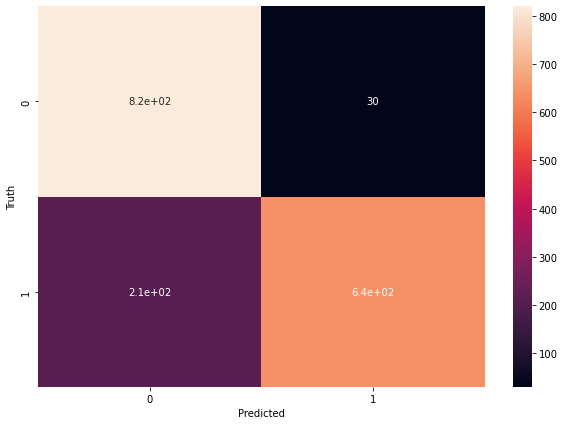

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.80      0.96      0.87       850
           1       0.96      0.75      0.84       850

    accuracy                           0.86      1700
   macro avg       0.88      0.86      0.86      1700
weighted avg       0.88      0.86      0.86      1700



In [ ]:
model = LogisticRegression()
fold = StratifiedKFold(n_splits=10, shuffle=True)
lst_accu_stratified = []
for train_index, test_index in fold.split(x, y):
    x_train_fold, x_test_fold = x.iloc[train_index], x.iloc[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]
    model.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(model.score(x_test_fold, y_test_fold))
    y_pre = model.predict(x_test_fold)
    cd = confusion_matrix(y_test_fold, y_pre)
lst_accu_stratified

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

[0.8688235294117647,
 0.8817647058823529,
 0.8794117647058823,
 0.87,
 0.8935294117647059,
 0.8811764705882353,
 0.8782352941176471,
 0.8705882352941177,
 0.8870588235294118,
 0.8735294117647059]

In [ ]:
np.average(lst_accu_stratified)

0.8784117647058822

In [ ]:
cd

array([[739, 111],
       [104, 746]], dtype=int64)

Text(69.0, 0.5, 'Truth')

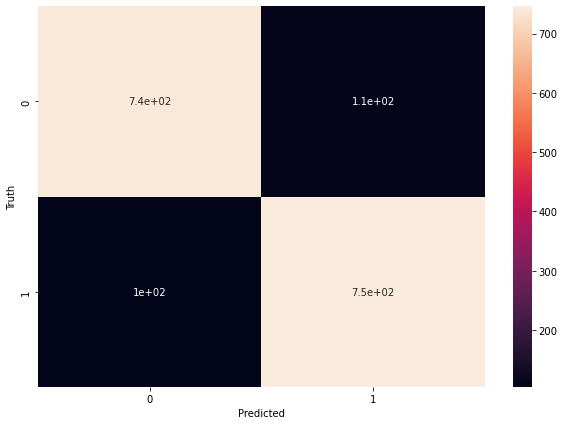

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
print(classification_report(y_test_fold, y_pre))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87       850
           1       0.87      0.88      0.87       850

    accuracy                           0.87      1700
   macro avg       0.87      0.87      0.87      1700
weighted avg       0.87      0.87      0.87      1700



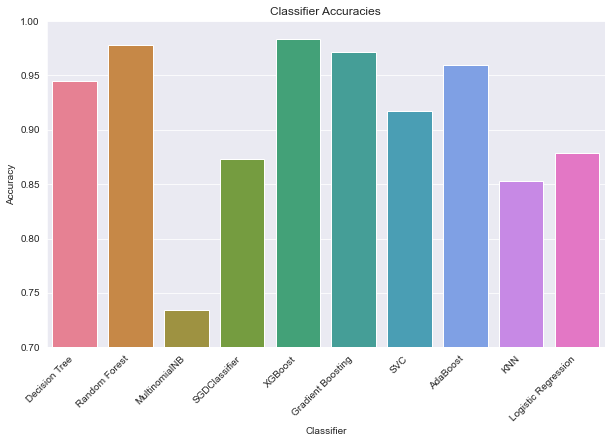

In [ ]:
classifiers = ['Decision Tree', 'Random Forest', 'MultinomialNB', 'SGDClassifier', 'XGBoost', 'Gradient Boosting', 'SVC', 'AdaBoost', 'KNN', 'Logistic Regression']
accuracies = [0.9454, 0.978, 0.7344, 0.8736, 0.9840, 0.9712, 0.9177, 0.9600, 0.8528, 0.8784]

plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
sns.barplot(x=classifiers, y=accuracies, palette='husl')
plt.xticks(rotation=45, ha='right')
plt.ylim(0.7, 1.0)
plt.title('Classifier Accuracies')
plt.xlabel('Classifier')
plt.ylabel('Accuracy')
plt.savefig("Model accuracy")

## HyperParameter Tunning

In [ ]:
# Applying train test split to sperate 20 percent data for hyper parameter tuning. 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

This code performs hyperparameter tuning for an XGBoost classifier using randomized search cross-validation.

param_dist is a dictionary containing the hyperparameters and their possible values that we want to search over.

xgb = XGBClassifier() creates an instance of the XGBoost classifier.

skf = StratifiedKFold(n_splits=10) creates a stratified k-fold object with 10 splits.

randomSearch = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=50, cv=skf, random_state=0) creates an instance of the randomized search cross-validation object with 50 iterations. The xgb classifier is passed as the estimator, param_dist is passed as the dictionary of hyperparameters to search over, cv is set to the stratified k-fold object, and random_state is set to ensure reproducibility.

randomSearch.fit(X_train, y_train) fits the randomized search object to the training data to find the best combination of hyperparameters. The best hyperparameters can be accessed using randomSearch.best_params_.

In [ ]:
param_dist = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.5],
    'reg_lambda': [1, 10, 100]
}

xgb = XGBClassifier()

skf = StratifiedKFold(n_splits=10)

randomSearch = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=50, cv=skf, random_state=0)

randomSearch.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           impo...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'colsample_bytree': [0.5, 0.8, 1],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'min_child_weight': [1, 3, 5],
                                        'reg_lambda': [1, 10, 100],
                                        'subsample': [0.5, 0.8, 1]},
                   random_state=0)

In [ ]:
print("Best Hyperparameters: ", randomSearch.best_params_)
print("Best Mean Score: ", randomSearch.best_score_)

Best Hyperparameters:  {'subsample': 0.5, 'reg_lambda': 1, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.5}
Best Mean Score:  0.9827941176470588


In [ ]:
y_pre = randomSearch.predict(X_test)
cd = confusion_matrix(y_test, y_pre)

## Final Results

In [ ]:
print(classification_report(y_test, y_pre))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1693
           1       0.98      0.98      0.98      1707

    accuracy                           0.98      3400
   macro avg       0.98      0.98      0.98      3400
weighted avg       0.98      0.98      0.98      3400



In [ ]:
cd

array([[1663,   30],
       [  26, 1681]], dtype=int64)

Text(69.0, 0.5, 'Truth')

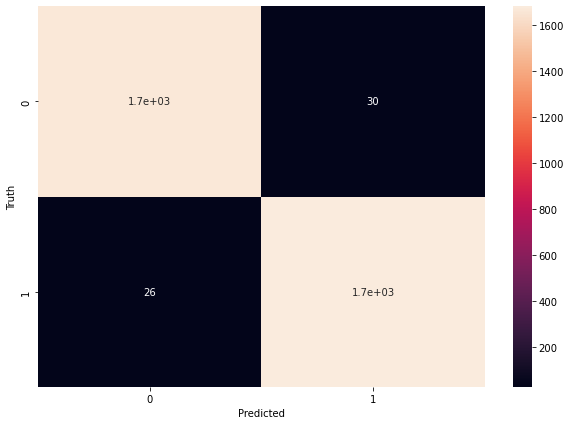

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(cd, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Learning Rate Curve Using Best Hyperparameter that we get from Hyperparameter Tuning

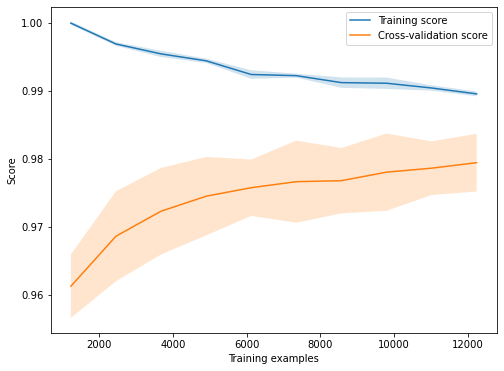

In [ ]:
xgb = XGBClassifier(learning_rate=0.1, max_depth=5, subsample=0.8, colsample_bytree=0.8, 
                    min_child_weight=1, gamma=0.1, reg_lambda=1)

train_sizes, train_scores, test_scores = learning_curve(xgb, X_train, y_train, cv=10, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2)
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2)
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.legend(loc='best')
plt.show()